In [2]:
pip install pandas numpy yfinance matplotlib 


Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf

# Download historical data for multiple stocks
tickers = ['AAPL', 'MSFT', 'GOOGL']
data = yf.download(tickers, start='2010-01-01', end='2023-12-31')
print(data.head())

[*********************100%***********************]  3 of 3 completed

Price                     Adj Close                           Close  \
Ticker                         AAPL      GOOGL       MSFT      AAPL   
Date                                                                  
2010-01-04 00:00:00+00:00  6.447413  15.627782  23.300684  7.643214   
2010-01-05 00:00:00+00:00  6.458559  15.558963  23.308207  7.656429   
2010-01-06 00:00:00+00:00  6.355827  15.166740  23.165163  7.534643   
2010-01-07 00:00:00+00:00  6.344077  14.813666  22.924257  7.520714   
2010-01-08 00:00:00+00:00  6.386256  15.011149  23.082354  7.570714   

Price                                                High             \
Ticker                         GOOGL       MSFT      AAPL      GOOGL   
Date                                                                   
2010-01-04 00:00:00+00:00  15.684434  30.950001  7.660714  15.753504   
2010-01-05 00:00:00+00:00  15.615365  30.959999  7.699643  15.711712   
2010-01-06 00:00:00+00:00  15.221722  30.770000  7.686786  15.662162   

In [4]:
print(data.head())
print(data.columns)

Price                     Adj Close                           Close  \
Ticker                         AAPL      GOOGL       MSFT      AAPL   
Date                                                                  
2010-01-04 00:00:00+00:00  6.447413  15.627782  23.300684  7.643214   
2010-01-05 00:00:00+00:00  6.458559  15.558963  23.308207  7.656429   
2010-01-06 00:00:00+00:00  6.355827  15.166740  23.165163  7.534643   
2010-01-07 00:00:00+00:00  6.344077  14.813666  22.924257  7.520714   
2010-01-08 00:00:00+00:00  6.386256  15.011149  23.082354  7.570714   

Price                                                High             \
Ticker                         GOOGL       MSFT      AAPL      GOOGL   
Date                                                                   
2010-01-04 00:00:00+00:00  15.684434  30.950001  7.660714  15.753504   
2010-01-05 00:00:00+00:00  15.615365  30.959999  7.699643  15.711712   
2010-01-06 00:00:00+00:00  15.221722  30.770000  7.686786  15.662162   

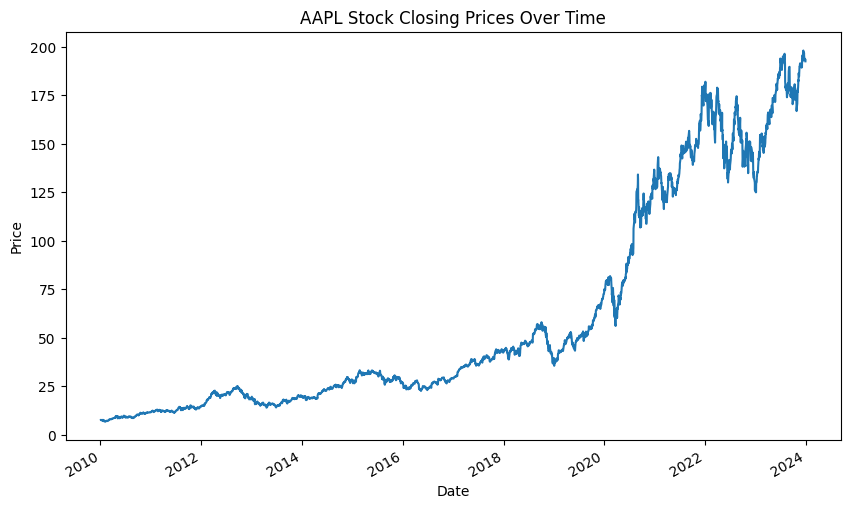

In [5]:
from matplotlib import pyplot as plt

data[('Close', 'AAPL')].plot(figsize=(10, 6))
plt.title("AAPL Stock Closing Prices Over Time")
plt.ylabel("Price")
plt.xlabel("Date")
plt.show()


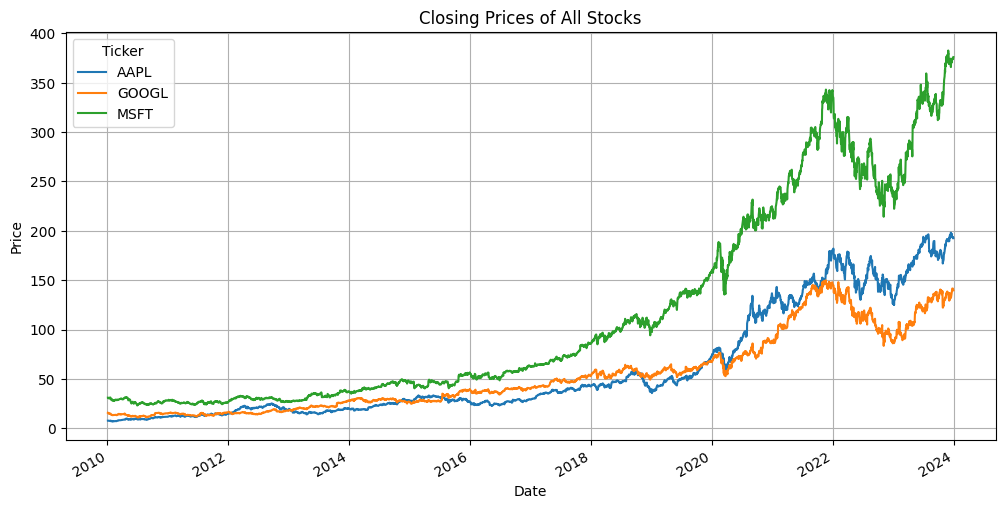

In [6]:
import matplotlib.pyplot as plt

# Plot all stocks' closing prices
data['Close'].plot(figsize=(12, 6))
plt.title("Closing Prices of All Stocks")
plt.ylabel("Price")
plt.xlabel("Date")
plt.legend(title="Ticker", loc='upper left')
plt.grid()
plt.show()


In [7]:
# Check for missing values
print(data.isnull().sum())


Price      Ticker
Adj Close  AAPL      0
           GOOGL     0
           MSFT      0
Close      AAPL      0
           GOOGL     0
           MSFT      0
High       AAPL      0
           GOOGL     0
           MSFT      0
Low        AAPL      0
           GOOGL     0
           MSFT      0
Open       AAPL      0
           GOOGL     0
           MSFT      0
Volume     AAPL      0
           GOOGL     0
           MSFT      0
dtype: int64


In [8]:
# Fill missing values
data = data.ffill().bfill()


In [9]:
# Access the 'Close' prices for AAPL
aapl_close = data[('Close', 'AAPL')]

# Calculate SMA and EMA
data[('SMA_20', 'AAPL')] = aapl_close.rolling(window=20).mean()
data[('EMA_20', 'AAPL')] = aapl_close.ewm(span=20, adjust=False).mean()


In [10]:
# Loop through all tickers
tickers = data.columns.levels[1]  # Extract tickers (e.g., 'AAPL', 'GOOGL', 'MSFT')

for ticker in tickers:
    close_prices = data[('Close', ticker)]
    
    # Calculate SMA and EMA
    data[('SMA_20', ticker)] = close_prices.rolling(window=20).mean()
    data[('EMA_20', ticker)] = close_prices.ewm(span=20, adjust=False).mean()


In [11]:
# Flatten MultiIndex
data.columns = ['_'.join(col).strip() for col in data.columns.values]

# Example: Access 'Close_AAPL' after flattening
data['Close_AAPL'].rolling(window=20).mean()


Date
2010-01-04 00:00:00+00:00           NaN
2010-01-05 00:00:00+00:00           NaN
2010-01-06 00:00:00+00:00           NaN
2010-01-07 00:00:00+00:00           NaN
2010-01-08 00:00:00+00:00           NaN
                                ...    
2023-12-22 00:00:00+00:00    193.668501
2023-12-26 00:00:00+00:00    193.831501
2023-12-27 00:00:00+00:00    193.969001
2023-12-28 00:00:00+00:00    194.179501
2023-12-29 00:00:00+00:00    194.308501
Name: Close_AAPL, Length: 3522, dtype: float64

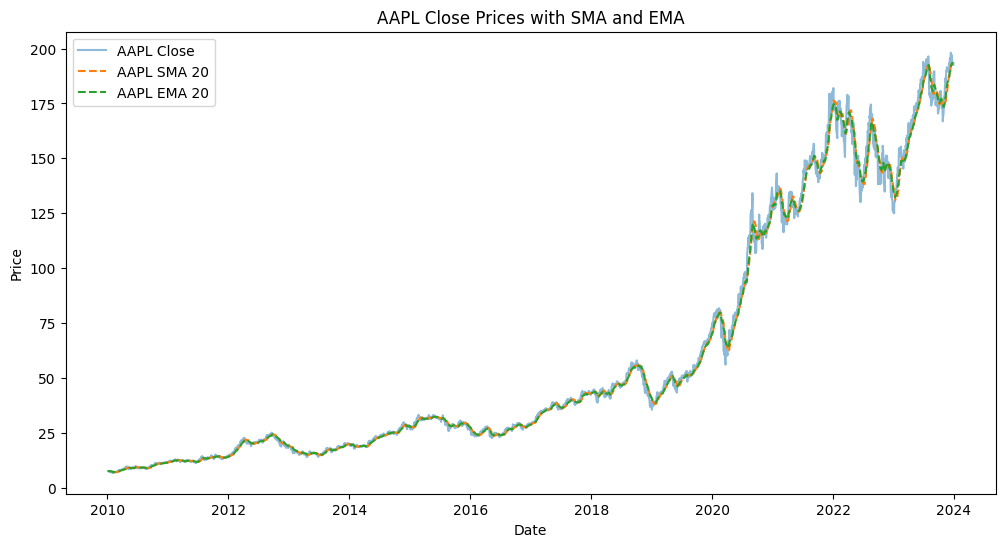

In [12]:
import matplotlib.pyplot as plt

# Plot Close prices with SMA and EMA for AAPL
plt.figure(figsize=(12, 6))
plt.plot(data['Close_AAPL'], label='AAPL Close', alpha=0.5)
plt.plot(data['SMA_20_AAPL'], label='AAPL SMA 20', linestyle='--')
plt.plot(data['EMA_20_AAPL'], label='AAPL EMA 20', linestyle='--')
plt.title('AAPL Close Prices with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


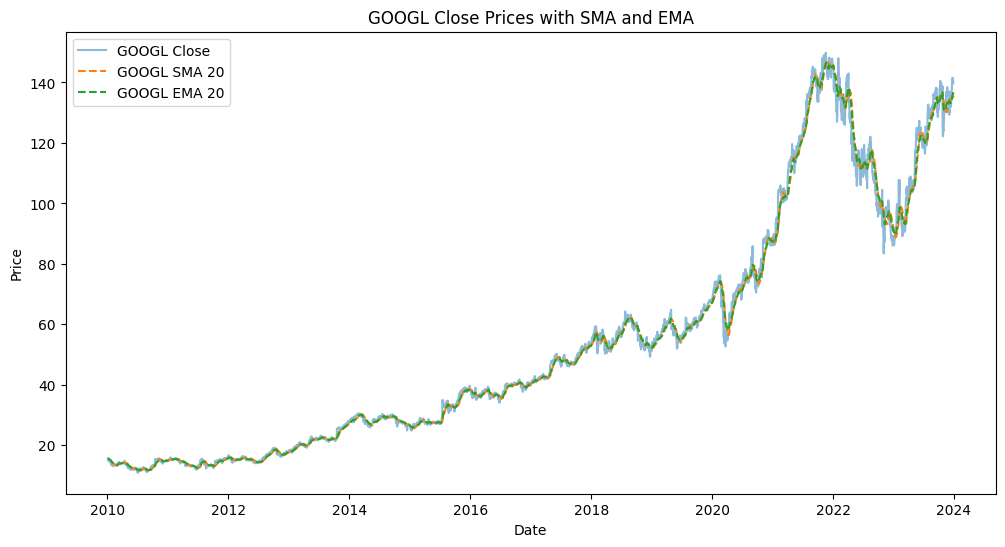

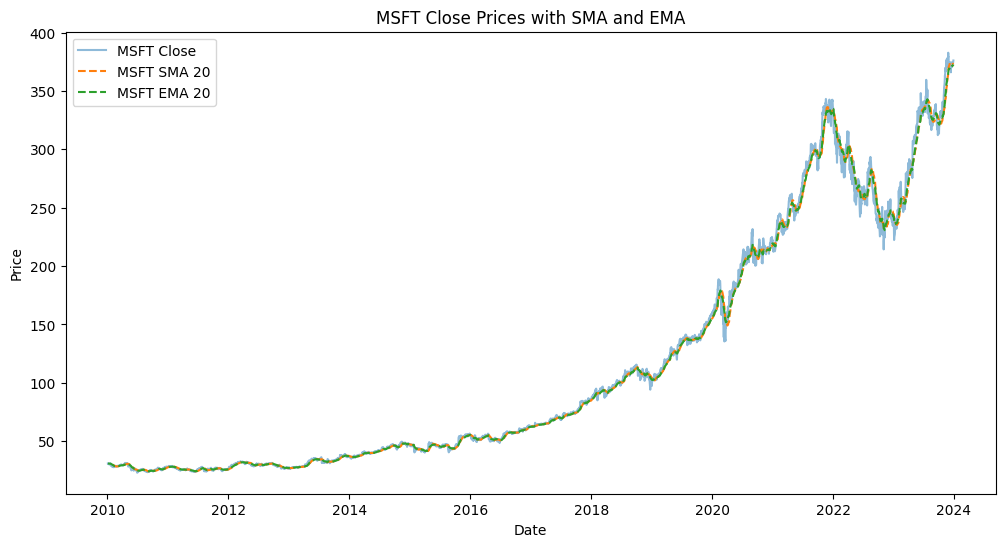

In [13]:
# For GOOGL
plt.figure(figsize=(12, 6))
plt.plot(data['Close_GOOGL'], label='GOOGL Close', alpha=0.5)
plt.plot(data['SMA_20_GOOGL'], label='GOOGL SMA 20', linestyle='--')
plt.plot(data['EMA_20_GOOGL'], label='GOOGL EMA 20', linestyle='--')
plt.title('GOOGL Close Prices with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# For MSFT
plt.figure(figsize=(12, 6))
plt.plot(data['Close_MSFT'], label='MSFT Close', alpha=0.5)
plt.plot(data['SMA_20_MSFT'], label='MSFT SMA 20', linestyle='--')
plt.plot(data['EMA_20_MSFT'], label='MSFT EMA 20', linestyle='--')
plt.title('MSFT Close Prices with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [14]:
def calculate_rsi(data, window=14):
    # Calculate price changes
    delta = data.diff()
    
    # Separate gains and losses
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    
    # Calculate RSI
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Apply RSI for each ticker
data['RSI_AAPL'] = calculate_rsi(data['Close_AAPL'])
data['RSI_GOOGL'] = calculate_rsi(data['Close_GOOGL'])
data['RSI_MSFT'] = calculate_rsi(data['Close_MSFT'])


In [15]:
def calculate_bollinger_bands(data, window=20):
    sma = data.rolling(window=window).mean()
    std = data.rolling(window=window).std()
    upper_band = sma + (2 * std)
    lower_band = sma - (2 * std)
    return sma, upper_band, lower_band

# Apply Bollinger Bands for each ticker
data['BB_Middle_AAPL'], data['BB_Upper_AAPL'], data['BB_Lower_AAPL'] = calculate_bollinger_bands(data['Close_AAPL'])
data['BB_Middle_GOOGL'], data['BB_Upper_GOOGL'], data['BB_Lower_GOOGL'] = calculate_bollinger_bands(data['Close_GOOGL'])
data['BB_Middle_MSFT'], data['BB_Upper_MSFT'], data['BB_Lower_MSFT'] = calculate_bollinger_bands(data['Close_MSFT'])


In [16]:
# Calculate daily returns for each ticker
data['Daily_Return_AAPL'] = data['Close_AAPL'].pct_change()
data['Daily_Return_GOOGL'] = data['Close_GOOGL'].pct_change()
data['Daily_Return_MSFT'] = data['Close_MSFT'].pct_change()


In [17]:
# Create lag features for each ticker
for lag in range(1, 6):  # 1-day to 5-day lag
    data[f'Lag_{lag}_AAPL'] = data['Close_AAPL'].shift(lag)
    data[f'Lag_{lag}_GOOGL'] = data['Close_GOOGL'].shift(lag)
    data[f'Lag_{lag}_MSFT'] = data['Close_MSFT'].shift(lag)


In [18]:
print(data.head())


                           Adj Close_AAPL  Adj Close_GOOGL  Adj Close_MSFT  \
Date                                                                         
2010-01-04 00:00:00+00:00        6.447413        15.627782       23.300684   
2010-01-05 00:00:00+00:00        6.458559        15.558963       23.308207   
2010-01-06 00:00:00+00:00        6.355827        15.166740       23.165163   
2010-01-07 00:00:00+00:00        6.344077        14.813666       22.924257   
2010-01-08 00:00:00+00:00        6.386256        15.011149       23.082354   

                           Close_AAPL  Close_GOOGL  Close_MSFT  High_AAPL  \
Date                                                                        
2010-01-04 00:00:00+00:00    7.643214    15.684434   30.950001   7.660714   
2010-01-05 00:00:00+00:00    7.656429    15.615365   30.959999   7.699643   
2010-01-06 00:00:00+00:00    7.534643    15.221722   30.770000   7.686786   
2010-01-07 00:00:00+00:00    7.520714    14.867367   30.450001   7.5

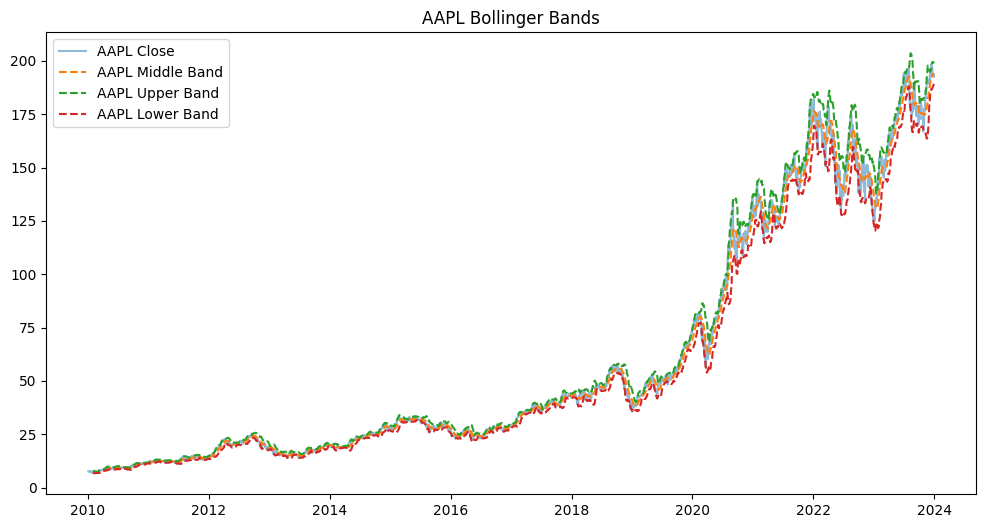

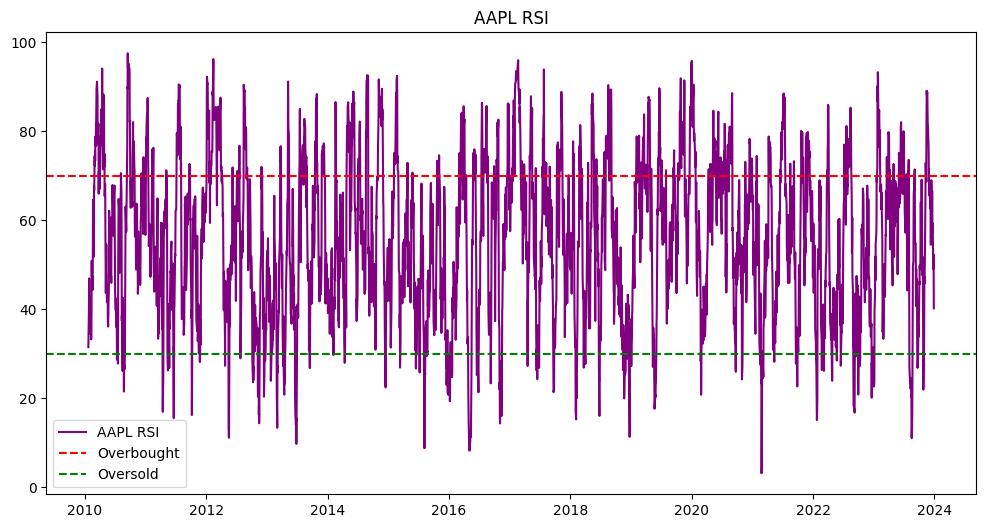

In [19]:
# Plot Bollinger Bands for AAPL
plt.figure(figsize=(12, 6))
plt.plot(data['Close_AAPL'], label='AAPL Close', alpha=0.5)
plt.plot(data['BB_Middle_AAPL'], label='AAPL Middle Band', linestyle='--')
plt.plot(data['BB_Upper_AAPL'], label='AAPL Upper Band', linestyle='--')
plt.plot(data['BB_Lower_AAPL'], label='AAPL Lower Band', linestyle='--')
plt.title('AAPL Bollinger Bands')
plt.legend()
plt.show()

# Plot RSI for AAPL
plt.figure(figsize=(12, 6))
plt.plot(data['RSI_AAPL'], label='AAPL RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('AAPL RSI')
plt.legend()
plt.show()


In [20]:
# Define the target variable (Next Day Close for AAPL)
data['Target_AAPL'] = data['Close_AAPL'].shift(-1)

# Select features for training
features = [
    'SMA_20_AAPL', 'EMA_20_AAPL', 'RSI_AAPL', 
    'BB_Middle_AAPL', 'BB_Upper_AAPL', 'BB_Lower_AAPL', 
    'Daily_Return_AAPL', 'Lag_1_AAPL', 'Lag_2_AAPL', 
    'Lag_3_AAPL', 'Lag_4_AAPL', 'Lag_5_AAPL'
]

# Drop rows with NaN values (from lag and rolling calculations)
data_model = data.dropna()

# Extract input features (X) and target (y)
X = data_model[features]
y = data_model['Target_AAPL']


In [21]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 2.6342417966307767
R^2 Score: 0.9991437498157545


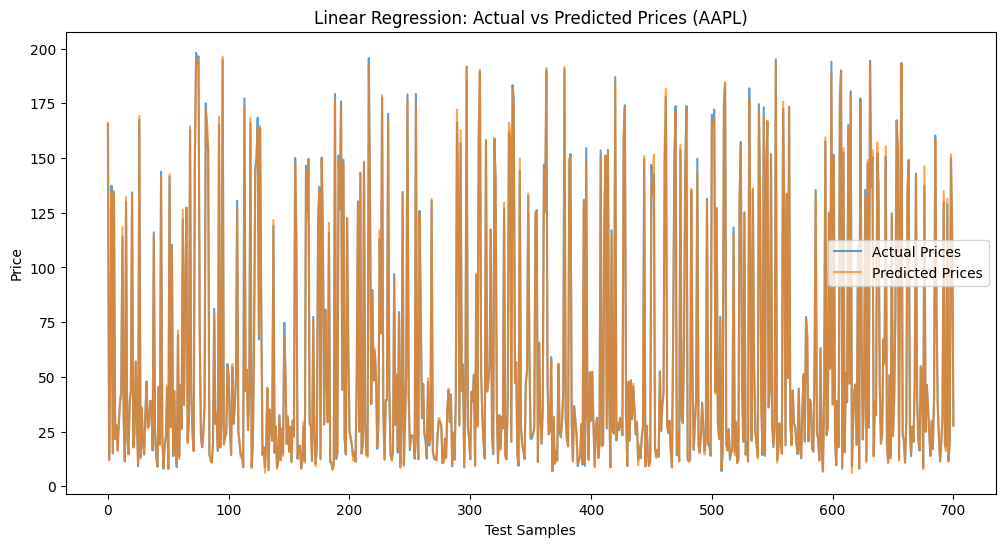

In [23]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', alpha=0.7)
plt.plot(y_pred, label='Predicted Prices', alpha=0.7)
plt.title('Linear Regression: Actual vs Predicted Prices (AAPL)')
plt.xlabel('Test Samples')
plt.ylabel('Price')
plt.legend()
plt.show()


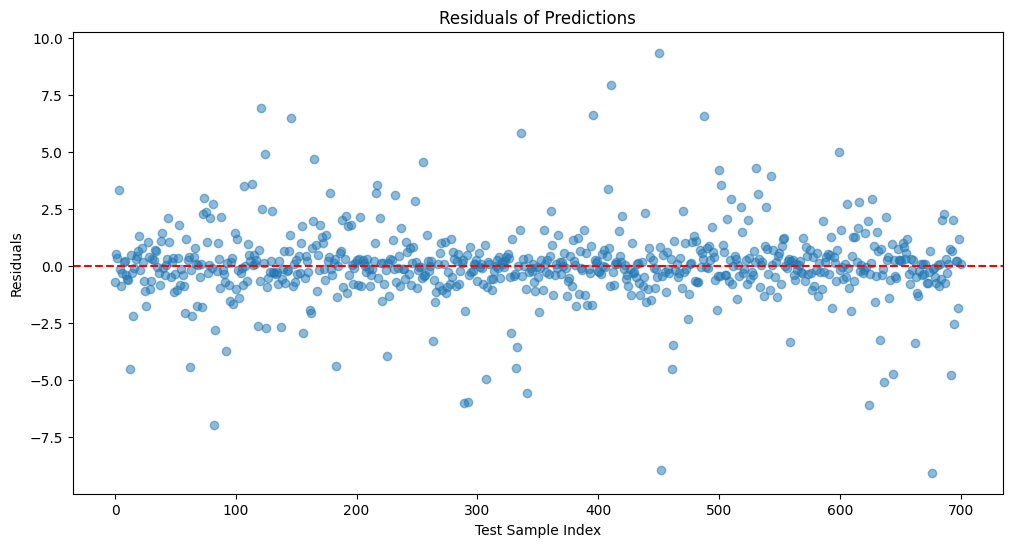

In [24]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of Predictions')
plt.xlabel('Test Sample Index')
plt.ylabel('Residuals')
plt.show()


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R² Score: {r2_rf}")


Random Forest MSE: 2.363390880007426
Random Forest R² Score: 0.9992317888665199


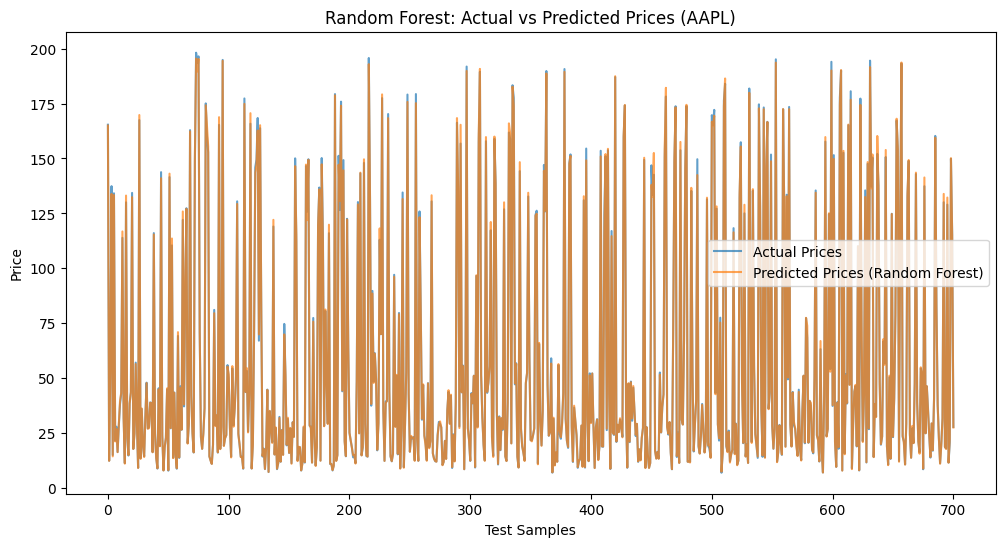

In [26]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', alpha=0.7)
plt.plot(y_rf_pred, label='Predicted Prices (Random Forest)', alpha=0.7)
plt.title('Random Forest: Actual vs Predicted Prices (AAPL)')
plt.xlabel('Test Samples')
plt.ylabel('Price')
plt.legend()
plt.show()


In [27]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [28]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Define the target variable (Next Day Close for AAPL)
data['Target_AAPL'] = data['Close_AAPL'].shift(-1)

# Drop NaN rows caused by shifting
data_lstm = data.dropna()

# Select features and target
features = [
    'SMA_20_AAPL', 'EMA_20_AAPL', 'RSI_AAPL',
    'BB_Middle_AAPL', 'BB_Upper_AAPL', 'BB_Lower_AAPL',
    'Daily_Return_AAPL', 'Lag_1_AAPL', 'Lag_2_AAPL',
    'Lag_3_AAPL', 'Lag_4_AAPL', 'Lag_5_AAPL'
]
X = data_lstm[features]
y = data_lstm['Target_AAPL']

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Convert data into sequences for LSTM
def create_sequences(X, y, sequence_length=60):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i + sequence_length])
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

# Create sequences with a sequence length of 60 days
sequence_length = 60
X_seq, y_seq = create_sequences(X_scaled, y_scaled, sequence_length=sequence_length)

# Split into training and testing sets
train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build a smaller LSTM model
model = Sequential()

# Add a single LSTM layer
model.add(LSTM(units=32, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Regularization

# Add a Dense layer for the output
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
model.summary()


# Train the model with a smaller batch size
history = model.fit(
    X_train, y_train,
    epochs=10,  # Start with fewer epochs
    batch_size=16,  # Smaller batch size
    validation_data=(X_test, y_test),
    verbose=1
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 32)                  │           5,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,793 (22.63 KB)

 Trainable params: 5,793 (22.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0462 - val_loss: 0.0183
Epoch 2/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 3/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 4/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 5/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 9.3787e-04 - val_loss: 0.0019
Epoch 6/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 8.4966e-04 - val_loss: 0.0012
Epoch 7/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 7.8115e-04 - val_loss: 0.0014
Epoch 8/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 6.0969e-04 - val_loss: 0.0018
Epoch 9/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 4.8492e-04 - val_loss: 0.0033
Epoch 10/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 5.0739e-04 - val_loss: 0.0012


In [30]:
# Predict on the testing set
y_pred_scaled = model.predict(X_test)

# Inverse scale the predictions and actual values
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_actual = scaler_y.inverse_transform(y_test)

# Calculate MSE and R² Score
from sklearn.metrics import mean_squared_error, r2_score

mse_lstm = mean_squared_error(y_actual, y_pred)
r2_lstm = r2_score(y_actual, y_pred)

print(f"LSTM MSE: {mse_lstm}")
print(f"LSTM R² Score: {r2_lstm}")


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
LSTM MSE: 44.40998206500119
LSTM R² Score: 0.8723935862029978


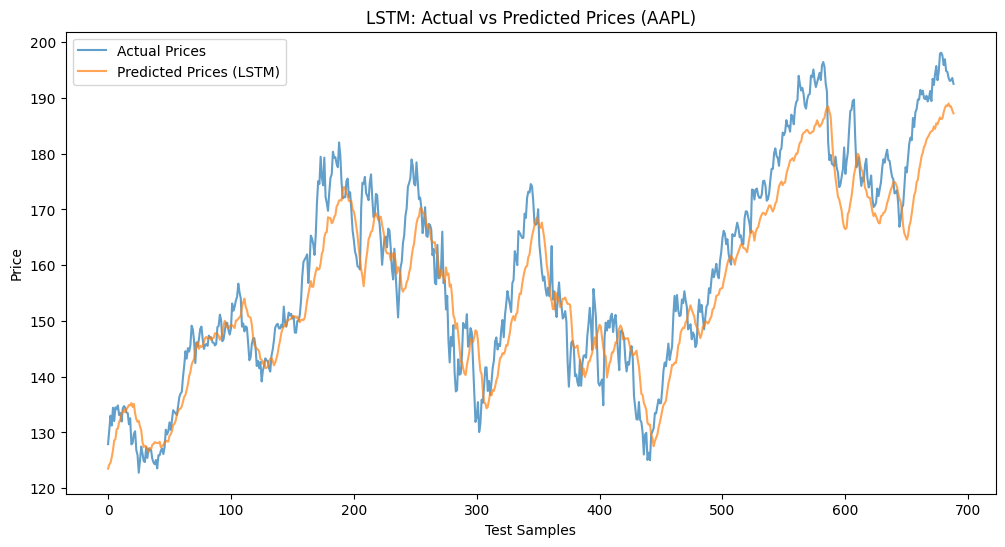

In [31]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_actual, label='Actual Prices', alpha=0.7)
plt.plot(y_pred, label='Predicted Prices (LSTM)', alpha=0.7)
plt.title('LSTM: Actual vs Predicted Prices (AAPL)')
plt.xlabel('Test Samples')
plt.ylabel('Price')
plt.legend()
plt.show()


In [32]:
# Build a refined LSTM model
model_refined = Sequential()

# Add more units and layers
model_refined.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_refined.add(Dropout(0.3))
model_refined.add(LSTM(units=100, return_sequences=False))
model_refined.add(Dropout(0.3))
model_refined.add(Dense(units=1))

# Compile the model with a different optimizer
model_refined.compile(optimizer='rmsprop', loss='mean_squared_error')

# Train the refined model
history_refined = model_refined.fit(
    X_train, y_train,
    epochs=30,  # Increase epochs
    batch_size=16,  # Reduce batch size
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - loss: 0.0093 - val_loss: 0.0039
Epoch 2/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 0.0012 - val_loss: 0.0030
Epoch 3/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 9.2618e-04 - val_loss: 0.0095
Epoch 4/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 8.0090e-04 - val_loss: 0.0013
Epoch 5/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 6.6786e-04 - val_loss: 0.0013
Epoch 6/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 6.0966e-04 - val_loss: 0.0015
Epoch 7/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 5.5155e-04 - val_loss: 0.0056
Epoch 8/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 4.8475e-04 - val_loss: 0.0036
Epoch 9/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 5.5347e-04 - val_loss: 0.0012
Epoch 10/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 5.3577e-04 - val_loss: 0.0019
Epoch 11/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 4.1960e-04 - val_loss: 0.0079
Epoch 12/30
173

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

# Add early stopping to monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train with early stopping
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 5.8829e-04 - val_loss: 0.0013
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 4.8564e-04 - val_loss: 0.0010
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 4.7169e-04 - val_loss: 0.0011
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 5.4405e-04 - val_loss: 0.0011
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 4.5805e-04 - val_loss: 0.0023
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 4.3302e-04 - val_loss: 0.0012
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 4.3387e-04 - val_loss: 0.0031


In [34]:
# Predict on the testing set
y_pred_scaled = model.predict(X_test)

# Inverse scale the predictions and actual values
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_actual = scaler_y.inverse_transform(y_test)

# Calculate MSE and R² Score
from sklearn.metrics import mean_squared_error, r2_score

mse_lstm = mean_squared_error(y_actual, y_pred)
r2_lstm = r2_score(y_actual, y_pred)

print(f"LSTM MSE: {mse_lstm}")
print(f"LSTM R² Score: {r2_lstm}")


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
LSTM MSE: 37.06661672213803
LSTM R² Score: 0.893493809013996


In [35]:
# Flatten 3D LSTM input (X_train and X_test) into 2D for Random Forest
X_train_rf = X_train.reshape(X_train.shape[0], -1)  # Flatten to (samples, time_steps * features)
X_test_rf = X_test.reshape(X_test.shape[0], -1)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train.ravel())  # Flatten target for Random Forest

# Get predictions
y_rf_pred_test = rf_model.predict(X_test_rf)


In [36]:
# Get predictions from LSTM
y_lstm_pred_test_scaled = model.predict(X_test)

# Inverse transform the LSTM predictions
y_lstm_pred_test = scaler_y.inverse_transform(y_lstm_pred_test_scaled)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [37]:
# Combine predictions (assign weights based on observed performance)
weight_rf = 0.7  # Weight for Random Forest
weight_lstm = 0.3  # Weight for LSTM

# Hybrid prediction
y_hybrid_pred = (weight_rf * y_rf_pred_test) + (weight_lstm * y_lstm_pred_test)


In [38]:
from sklearn.linear_model import LinearRegression

# Create a new dataset with predictions as features
meta_features = np.column_stack((y_rf_pred_test, y_lstm_pred_test))

# Train a meta-model (Linear Regression)
meta_model = LinearRegression()
meta_model.fit(meta_features, y_test)

# Make hybrid predictions using the meta-model
y_hybrid_pred = meta_model.predict(meta_features)


In [39]:
# Evaluate the hybrid model
mse_hybrid = mean_squared_error(y_test, y_hybrid_pred)
r2_hybrid = r2_score(y_test, y_hybrid_pred)

print(f"Hybrid Model MSE: {mse_hybrid}")
print(f"Hybrid Model R² Score: {r2_hybrid}")


Hybrid Model MSE: 0.0008883512701534397
Hybrid Model R² Score: 0.9066349385829963


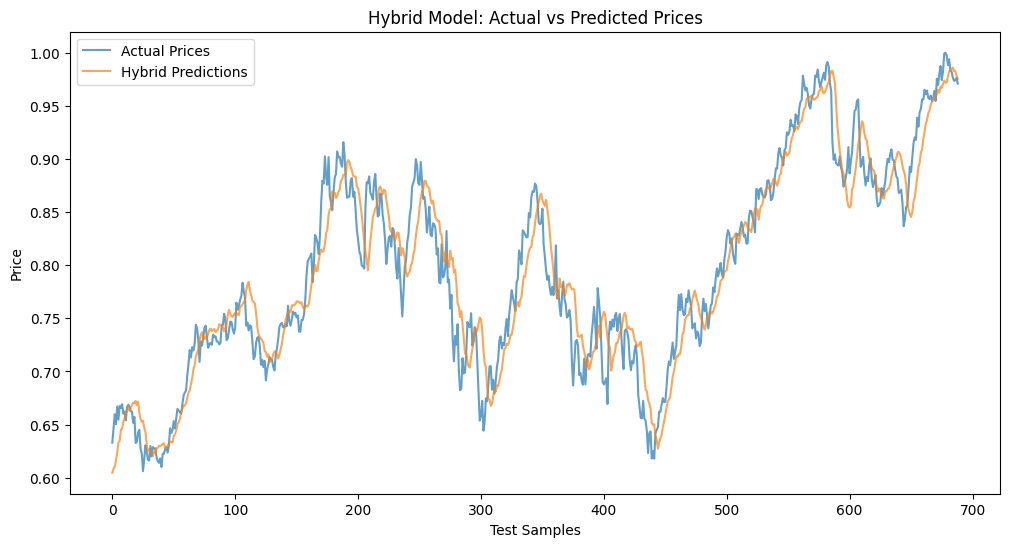

In [40]:
import matplotlib.pyplot as plt

# Plot actual vs hybrid predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', alpha=0.7)  # Remove .values
plt.plot(y_hybrid_pred, label='Hybrid Predictions', alpha=0.7)
plt.title('Hybrid Model: Actual vs Predicted Prices')
plt.xlabel('Test Samples')
plt.ylabel('Price')
plt.legend()
plt.show()


In [42]:
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_rf_pred_test: {len(y_rf_pred_test)}")
print(f"Length of y_lstm_pred_test: {len(y_lstm_pred_test)}")


Length of y_test: 689
Length of y_rf_pred_test: 689
Length of y_lstm_pred_test: 689


In [43]:
y_lstm_pred_test = y_lstm_pred_test.flatten()  # Flatten the array if it has extra dimensions


In [49]:
# Combine predictions using weighted average
y_hybrid_pred = (w_rf * y_rf_pred_test) + (w_lstm * y_lstm_pred_test)


In [50]:
# Ensure predictions align with test data
y_test = y_test[:len(y_hybrid_pred)]  # Trim y_test if necessary


In [51]:
 import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Define possible weights for Random Forest and LSTM
weights_rf = np.linspace(0, 1, 11)  # Values from 0 to 1 with step of 0.1
weights_lstm = 1 - weights_rf       # Complementary weights

# Initialize variables to store the best weights and performance
best_mse = float('inf')
best_weights = (0, 0)
best_r2 = 0

# Grid search over weight combinations
for w_rf, w_lstm in zip(weights_rf, weights_lstm):
    # Combine predictions using current weights
    y_hybrid_pred = (w_rf * y_rf_pred_test) + (w_lstm * y_lstm_pred_test)
    
    # Ensure predictions and y_test are aligned
    y_hybrid_pred = y_hybrid_pred[:len(y_test)]
    
    # Evaluate the hybrid predictions
    mse = mean_squared_error(y_test, y_hybrid_pred)
    r2 = r2_score(y_test, y_hybrid_pred)
    
    # Update best weights if performance improves
    if mse < best_mse:
        best_mse = mse
        best_r2 = r2
        best_weights = (w_rf, w_lstm)

print(f"Best Weights: Random Forest = {best_weights[0]}, LSTM = {best_weights[1]}")
print(f"Best MSE: {best_mse}")
print(f"Best R² Score: {best_r2}")


Best Weights: Random Forest = 1.0, LSTM = 0.0
Best MSE: 0.03240109622493479
Best R² Score: -2.405331247510652


In [52]:
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_rf_pred_test: {len(y_rf_pred_test)}")
print(f"Length of y_lstm_pred_test: {len(y_lstm_pred_test)}")


Length of y_test: 689
Length of y_rf_pred_test: 689
Length of y_lstm_pred_test: 689


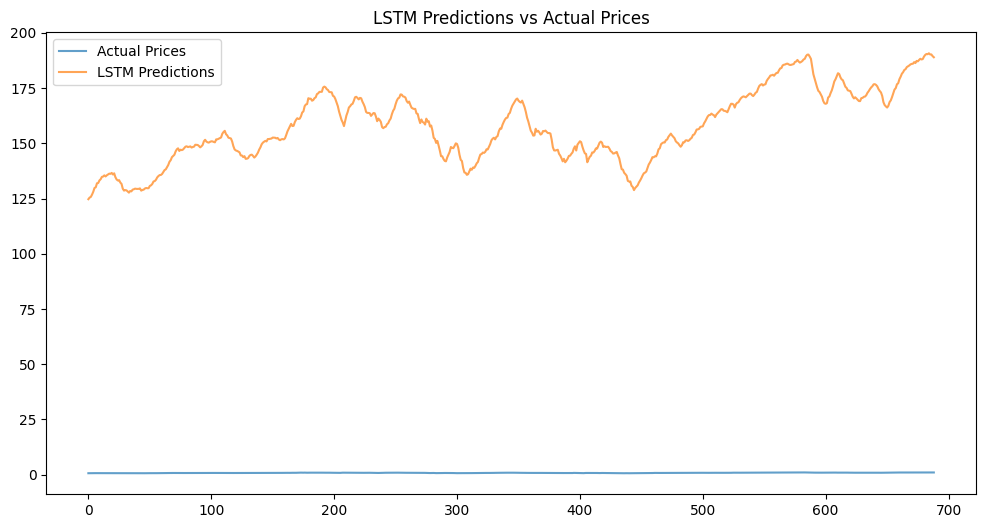

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', alpha=0.7)
plt.plot(y_lstm_pred_test, label='LSTM Predictions', alpha=0.7)
plt.title('LSTM Predictions vs Actual Prices')
plt.legend()
plt.show()


In [55]:
from sklearn.metrics import mean_squared_error, r2_score

mse_rf = mean_squared_error(y_test, y_rf_pred_test)
r2_rf = r2_score(y_test, y_rf_pred_test)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R² Score: {r2_rf}")



Random Forest MSE: 0.03240109622493479
Random Forest R² Score: -2.405331247510652


In [58]:
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_rf_pred_test: {len(y_rf_pred_test)}")



Length of y_test: 689
Length of y_rf_pred_test: 689


In [59]:
min_length = min(len(y_test), len(y_rf_pred_test))
y_test = y_test[:min_length]
y_rf_pred_test = y_rf_pred_test[:min_length]


In [60]:
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (2753, 60, 12), X_test shape: (689, 60, 12)
y_train shape: (2753, 1), y_test shape: (689, 1)


In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Retrain Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_rf_pred_test = rf_model.predict(X_test)

# Evaluate Random Forest
mse_rf = mean_squared_error(y_test, y_rf_pred_test)
r2_rf = r2_score(y_test, y_rf_pred_test)

print(f"Re-trained Random Forest MSE: {mse_rf}")
print(f"Re-trained Random Forest R² Score: {r2_rf}")


ValueError: Found array with dim 3. RandomForestRegressor expected <= 2.